In [1]:
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("speedups.txt")

In [19]:
coupling_map = CouplingMap.from_line(64)

# XXX we hardcoded layout to not be parallelized to avoid a pipe error
# before collecting data for this result -> change the hardcoded value

transpilers = [
    # Mirage(
    #     coupling_map, use_fast_settings=False, name="Mirage-SlowSerial", parallel=False
    # ),
    # Mirage(
    #     coupling_map, use_fast_settings=True, name="Mirage-FastSerial", parallel=False
    # ),
    QiskitLevel3(coupling_map, python_sabre=True),
    # Mirage(
    #     coupling_map,
    #     use_fast_settings=False,
    #     name="Mirage-SlowParallel",
    #     parallel=True,
    # ),
    Mirage(coupling_map, use_fast_settings=True, name="Mirage", parallel=True),
]

In [5]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    num_runs=1,
)
benchmark.run()

Circuits from library:   0%|          | 0/5 [00:00<?, ?it/s]

Loading qft_n16 from MQTBench
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 3.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:  20%|██        | 1/5 [00:15<01:03, 15.81s/it]

Loading qft_n24 from MQTBench


Circuits from library:  40%|████      | 2/5 [00:47<01:15, 25.24s/it]

Loading qft_n32 from MQTBench


Circuits from library:  60%|██████    | 3/5 [01:40<01:15, 37.90s/it]

Loading qft_n48 from MQTBench


Circuits from library:  80%|████████  | 4/5 [04:00<01:18, 78.20s/it]

Loading qft_n64 from MQTBench


Circuits from library: 100%|██████████| 5/5 [09:09<00:00, 109.92s/it]


In [8]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'total_runtime': {'average_change': -26.807663163050016,
  'best_circuit': 'qft_n64',
  'worst_circuit': 'qft_n16'}}

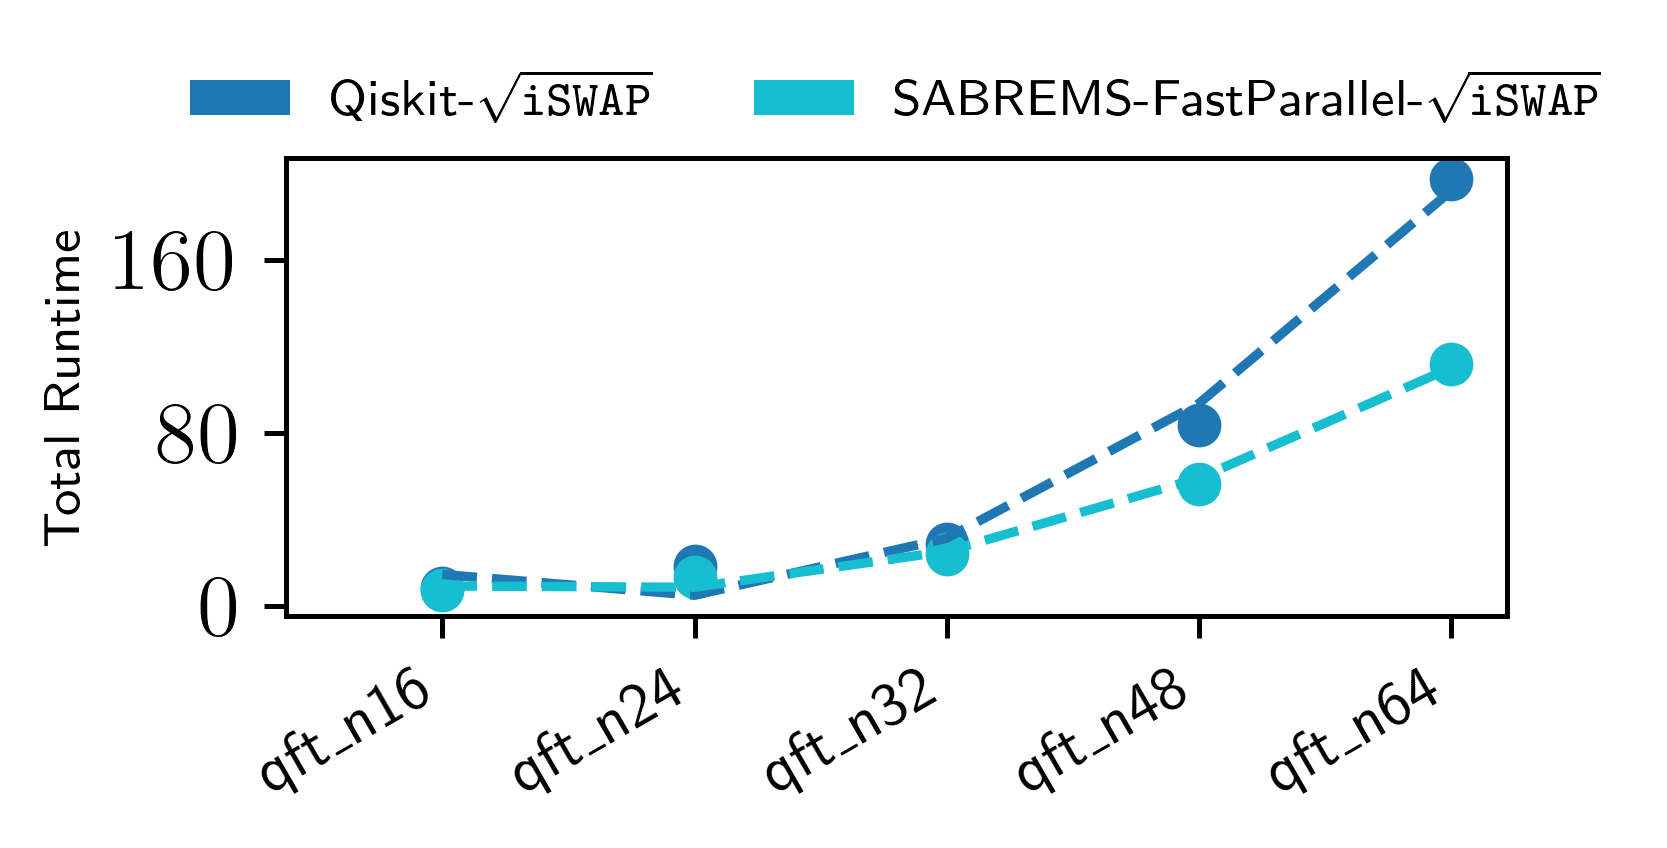

In [20]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark, save=0, legend_show=1, filename="speed", plot_type="trendline"
)

In [ ]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: total_runtime
  Circuit: qft_n16                                  Mean result: 7.289                          Trials: [7.28930926322937]
  Circuit: qft_n32                                  Mean result: 31.193                         Trials: [31.192856073379517]
  Circuit: qft_n64                                  Mean result: 191.297                        Trials: [191.29706168174744]
  Circuit: qft_n8                                   Mean result: 4.130                          Trials: [4.130185127258301]

Transpiler: SABREMS-FastParallel-$\sqrt{\texttt{iSWAP}}$
  Circuit: qft_n16                                  Mean result: 6.911                          Trials: [6.911120176315308]
  Circuit: qft_n32                                  Mean result: 26.106                         Trials: [26.106022834777832]
  Circuit: qft_n64                                  Mean result: 118.136                        Trials: [118.1362783908844]
  C